<a href="https://colab.research.google.com/github/ricky-kiva/dl-tensorflow-intro/blob/main/3_l1_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Convolution* to Improve Computer Vision Accuracy**

In [2]:
# import libraries
import tensorflow as tf

In [3]:
# load Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# normalize pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


**Conv2D** (convolutional layer) is used to act as a feature detector

**MaxPooling2D** (max pooling layer) is used to compress the image, by picking the highest pixel value in the pool

**Conv2D** args:
1.   **filters** (`32`): output 32 filters from this layer. each filter represents feature detector
2.   **kernel_size** (`(3,3)`): size of each kernel (convolutional filter)

**MaxPooling2D** args:
1.   **pool_size** (`(2,2)`): size of each kernel (pooling)

In [4]:
# defining model
model = tf.keras.models.Sequential([

    # add convolutions & max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # add fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# print model summary
model.summary()

# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

*   The first **Conv2D** has shape of `(26, 26)` because the 1st pixel in the upper-left of the image can't be convoluted: **it doesn't have nearby top & left pixel**. This resulted to the image being cropped in each side by 1 pixel
*   `32` after `(26, 26)` is the number of convolutional layer's output
*   The output of the 1st layer is maxpooled by `(2, 2)` resulting to half of the image shape
*   Increasing other convolutional layers after the first one allows the network to learn a more complex & abstract features from the data




In [65]:
# train the model
print('MODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0388 - accuracy: 0.9855
Epoch 2/5
1424/1875 [=====================>........] - ETA: 14s - loss: 0.0349 - accuracy: 0.9866

KeyboardInterrupt: ignored

In [6]:
# evaluate the model
print('MODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

MODEL EVALUATION:
313/313 [==============================] - 3s 9ms/step - loss: 0.2754 - accuracy: 0.9005


# **Visualizing Convolutions & Pooling**

Print the first 100 labels (get the same value & see **common features** in each convolution)

In [25]:
ten_label = ''
for index, label in enumerate(test_labels[:100]):
  if (index % 10 == 0):
    print(ten_label)
    ten_label = ''
  ten_label = ten_label + str(label) + ' '

print('\nNote: please -1, because index starts with 0')


9 2 1 1 6 1 4 6 5 7 
4 5 7 3 4 1 2 4 8 0 
2 5 7 9 1 4 6 0 9 3 
8 8 3 3 8 0 7 5 7 9 
6 1 3 7 6 7 2 1 2 2 
4 4 5 8 2 2 8 4 8 0 
7 7 8 5 1 1 2 3 9 8 
7 0 2 6 2 3 1 2 8 4 
1 8 5 9 5 0 3 2 0 6 

Note: please -1, because index starts with 0


In [26]:
# import libraries
import matplotlib.pyplot as plt
from tensorflow.keras import models

`keras.models.Model()`: create new model with the **same input** as `model` but has **multiple outputs corresponding to the outputs of each layer** in `model`

1/1 [==============================] - 0s 39ms/step


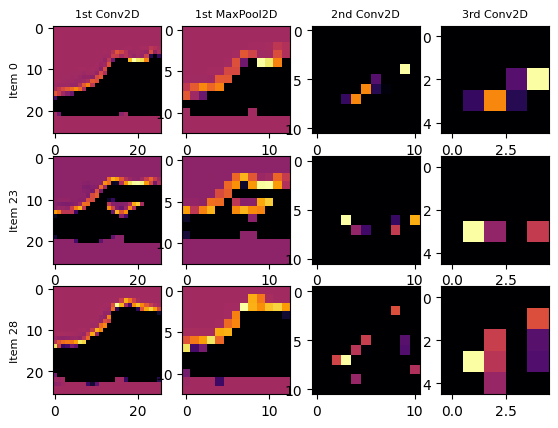

In [64]:
fig, axarr = plt.subplots(3, 4)

FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 4 # max 32-(1 (index)) in this case (filters argument from the Conv2D)

title_column = ['1st Conv2D', '1st MaxPool2D', '2nd Conv2D', '3rd Conv2D']
title_row = [f'Item {FIRST_IMAGE}', f'Item {SECOND_IMAGE}', f'Item {THIRD_IMAGE}']

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0, 4):
  axarr[0, x].set_title(title_column[x], fontsize=8)
  if x < 3:
    axarr[x, 0].set_ylabel(title_row[x], fontsize=8)

  # reshape because min dimension is 4 (known from error)
  # `Model.predict` return numpy array of predictions
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x] # get the `x` prediction (in this case: the filter)
  # f1[(get single image in dimension), (get x axis), (get y axis), (get the n-th convolution)]
  axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0, x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1, x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2, x].grid(False)

# **Trying Overfitting (Bad)**

In [7]:
# train the model
print('MODEL TRAINING:')
model.fit(training_images, training_labels, epochs=20)

MODEL TRAINING:
Epoch 1/20
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2003 - accuracy: 0.9253
Epoch 2/20
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1822 - accuracy: 0.9323
Epoch 3/20
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1679 - accuracy: 0.9371
Epoch 4/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1540 - accuracy: 0.9415
Epoch 5/20
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1408 - accuracy: 0.9464
Epoch 6/20
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1294 - accuracy: 0.9513
Epoch 7/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1179 - accuracy: 0.9550
Epoch 8/20
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1069 - accuracy: 0.9594
Epoch 9/20
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0981 - accuracy: 0.9637
Epoch 10/20
1875/1875 [=========================

In [8]:
# evaluate the model
print('MODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

MODEL EVALUATION:
313/313 [==============================] - 3s 9ms/step - loss: 0.4980 - accuracy: 0.9100


*   **loss** is highly unreasonable between the model *training* & *evaluation*. This is the symptoms of **overfitting**
*   in this *model evaluation*, there is an interesting case: loss & accuracy has the same high value. this could be because the *softmax activation in output layer* predicted probabilities for the correct class are very high, but the probabilities for the incorrect classes are also relatively high

